In [1]:
# --- Imports
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Model imports
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# --- Settings
sns.set_theme(style='whitegrid')
np.random.seed(42)

We load in the data and create a meshgrid of points used for predicting the values

In [2]:
# loading a numpy-array containing the topological data
z = np.load('topological_data_Ottadalen.npy')

# --- Generating dataset
n = 5_000 # the square root of the number of datapoints
x, y = np.linspace(0,n,n), np.linspace(0,n,n)
x, y = np.meshgrid(x, y)
x = x.ravel()
y = y.ravel()

z = z.ravel()

## OLS

In [31]:
# --- Creating design matrix
p = 10 # highest polynomial degree
N = np.arange(p+1) # for looping
L = [int((p+1)*(p+2)/2) for p in N] # beta lengths for plotting later
l = L[-1] # greatest beta length

# --- Loop
MSE_train, MSE_test = np.zeros(p), np.zeros(p)
R2_train, R2_test = np.zeros(p), np.zeros(p)
beta_values = np.zeros((p, l))

for idx, ex_p in enumerate(N[1:]):
    # we stack the values of x and y beside each other
    X = np.column_stack((x,y))

    # Splitting the data 
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=3)

    # we use pipeline to fit our model
    pipeline = make_pipeline(
            PolynomialFeatures(degree=ex_p),
            StandardScaler(),
            LinearRegression())

    # fitting our model to our train-dataset and predicting values fro both test and train
    pipeline.fit(X_train, z_train)
    z_tilde = pipeline.predict(X_train)
    z_predict = pipeline.predict(X_test)

    MSE_train[idx] = mean_squared_error(z_tilde, z_train)
    MSE_test[idx] = mean_squared_error(z_predict, z_test)
    R2_train[idx] = r2_score(z_tilde, z_train)
    R2_test[idx] = r2_score(z_predict, z_test)

    # retrieving the beta-values
    coefs = pipeline.named_steps['linearregression'].coef_
    beta_values[idx, :len(coefs)] = coefs

    print(f'Polynomial degree {idx}')


Polynomial degree 0
Polynomial degree 1
Polynomial degree 2
Polynomial degree 3
Polynomial degree 4
Polynomial degree 5
Polynomial degree 6
Polynomial degree 7
Polynomial degree 8
Polynomial degree 9


In [39]:
df = pd.DataFrame(beta_values, index=list(range(1,11)))
df.insert(df.shape[1], "MSE_train", MSE_train)
df.insert(df.shape[1], "MSE_test", MSE_test)
df.insert(df.shape[1], "R2_train", R2_train)
df.insert(df.shape[1], "R2_test", R2_test)
df.to_csv('OLS_5_values.csv', index=False)

In [40]:
df

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,MSE_train,MSE_test,R2_train,R2_test
1,0.000000e+00,-156.231453,-3.445869,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,113030.951961,113037.951811,-3.628565,-3.630880
2,0.000000e+00,221.455596,-272.644646,-327.944004,-91.890868,340.158039,0.000000,0.000000,0.000000,0.000000e+00,...,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,97867.448348,97865.504851,-1.472411,-1.471564
3,0.000000e+00,850.594844,-11.805833,-2121.668726,379.335195,-907.449235,1045.540844,191.019742,-612.515573,1.084274e+03,...,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,82874.832249,82884.790058,-0.518510,-0.519717
4,0.000000e+00,98.179855,2017.288452,978.768076,350.232937,-10072.426430,-2751.311212,-800.801350,152.164324,1.430765e+04,...,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,68908.065329,68976.531748,-0.005323,-0.006599
5,0.000000e+00,-227.938803,4108.840769,6627.975567,-4671.510825,-19806.118937,-17832.561137,4310.732408,11130.426538,3.216931e+04,...,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,63300.294897,63356.764803,0.146332,0.145203
6,-5.716478e-11,-544.152565,521.371180,3404.313739,5273.247911,6019.469288,-1812.157353,-6944.519783,-25449.238082,-4.734970e+04,...,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,55798.288048,55842.375970,0.316641,0.315691
7,-9.005582e-12,-1528.662469,-3183.454263,6467.810074,24611.535956,33819.925742,-21551.246912,-32649.336360,-122667.081261,-1.343589e+05,...,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,53795.563602,53840.260591,0.356941,0.355954
8,-8.365144e-09,-4433.487504,-400.358089,38307.261687,38879.579322,-16583.769795,-188291.697734,-176988.416860,-76586.441034,1.720878e+05,...,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,46387.872240,46435.203737,0.490598,0.489841
9,9.223738e-08,-4807.959244,-608.962528,59334.438113,13376.242878,14260.856556,-348100.185571,-134122.488335,100088.100275,-1.658340e+05,...,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,43512.448989,43545.403177,0.536800,0.536007
10,-3.381109e-05,3927.133441,-2719.770457,-85505.244719,-58537.443809,107520.400803,744780.210586,650868.441310,209856.293574,-1.126364e+06,...,-379703.78617,-1.837119e+06,1.398998e+06,2.417826e+06,-2.936310e+06,5.107486e+06,38453.908653,38504.396497,0.611566,0.610782


### Plotting the MSE and R2-score

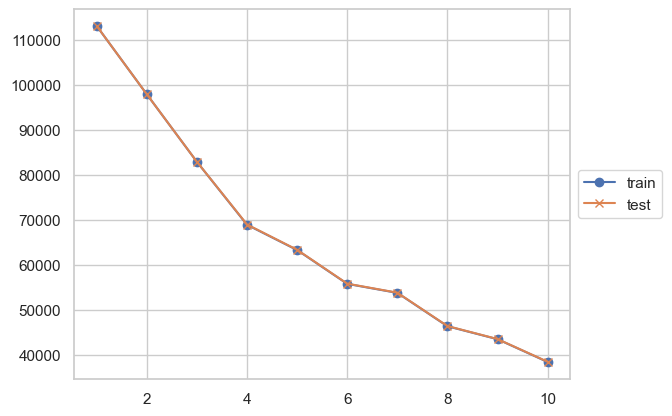

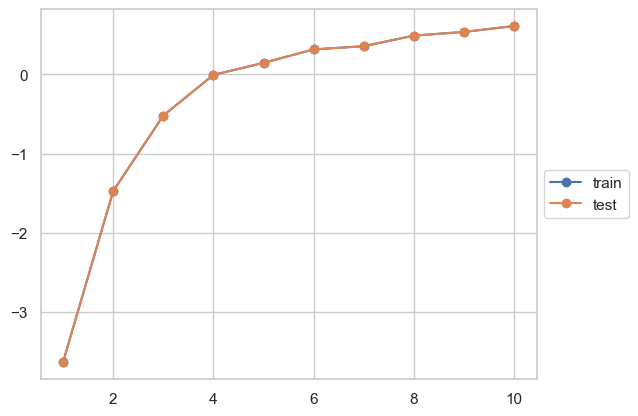

In [41]:
# Plotting MSE and R2 against complexity
plt.plot(N[1:], MSE_train, 'o-', label='train')
plt.plot(N[1:], MSE_test, 'x-', label='test')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=1, fancybox=True)
plt.show()

plt.plot(N[1:],R2_train, 'o-', label='train')
plt.plot(N[1:],R2_test, 'o-', label='test')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=1, fancybox=True)
plt.show()

### Plotting the topological data

Using the (currently last fitted model) to predict the entire dataset

In [42]:
z_total = pipeline.predict(X)

x_plot = x.reshape((n,n))
y_plot = y.reshape((n,n))
z_plot = z_total.reshape((n,n))

z_orig_plot = z.reshape((n,n))

Plotting the results in a 3D-plot

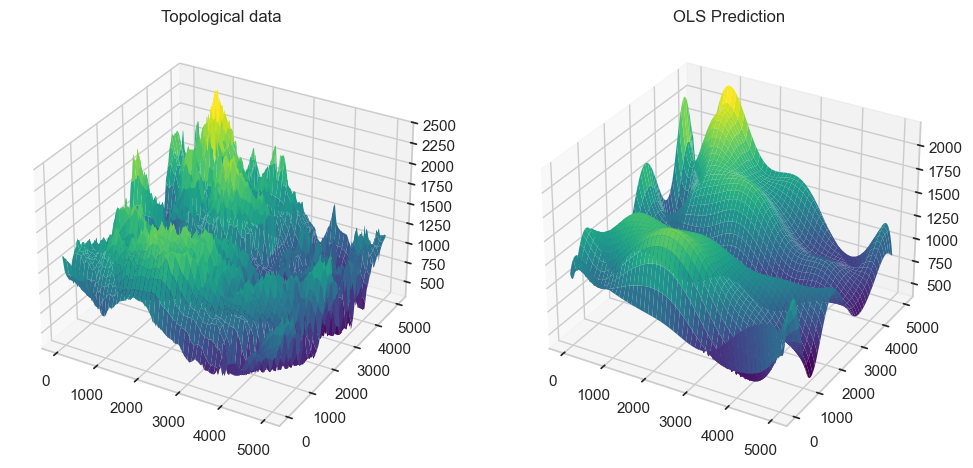

In [43]:
fig = plt.figure(figsize=(12, 6))

# Plotting the datapoints
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(x_plot, y_plot, z_orig_plot, cmap='viridis', edgecolor='none')
ax.set_title('Topological data')

# Plot the polynomial regression prediction (ideally a plane)
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(x_plot, y_plot, z_plot, cmap='viridis', edgecolor='none')
ax.set_title('OLS Prediction')

plt.show()

Plotting the results as a contour-plot

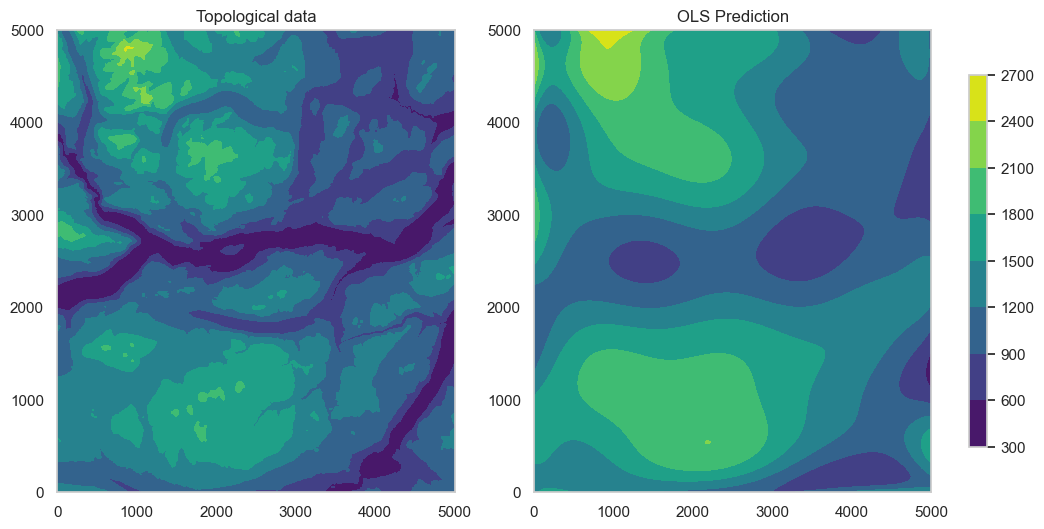

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the datapoints
original_data = axs[0].contourf(x_plot, y_plot, z_orig_plot, cmap='viridis')
axs[0].set_title('Topological data')

# Plot the polynomial regression prediction
fitted_data = axs[1].contourf(x_plot, y_plot, z_plot, cmap='viridis')
axs[1].set_title('OLS Prediction')


# Create the colorbar
contourf_objects = [original_data, fitted_data]
fig.colorbar(contourf_objects[0], ax=axs, orientation='vertical', fraction=0.02, pad=0.04)

plt.show()

## Ridge

In [8]:
p = 5 # highest polynomial degree 
N = np.arange(p+1) # for looping and plotting later
L = [int((p+1)*(p+2)/2) for p in N] # beta lengths
l = L[-1] # greatest beta length

logmin, logmax, m = -4, 0, 5 # logspce start, end, number of lambda values
llambdas = np.logspace(logmin, logmax, m)

beta_values = np.zeros((p+1, l, m))
MSE_train, MSE_test = np.zeros((p+1, m)), np.zeros((p+1, m))
R2_train, R2_test = np.zeros((p+1, m)), np.zeros((p+1, m))

for i in N:
    # we stack the values of x and y beside each other
    X = np.column_stack((x,y))

    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=3)

    for idx, lmbd in enumerate(llambdas):
        # we use pipeline to fit our model
        pipeline = make_pipeline(
            PolynomialFeatures(degree=i),
            StandardScaler(),
            Lasso(alpha=lmbd, fit_intercept=True, max_iter=56_000))

        pipeline.fit(X_train,z_train)
        z_tilde = pipeline.predict(X_train)
        z_predict = pipeline.predict(X_test)

        MSE_train[i, idx] = mean_squared_error(z_tilde, z_train)
        MSE_test[i, idx] = mean_squared_error(z_predict, z_test)
        R2_train[i, idx] = r2_score(z_tilde, z_train)
        R2_test[i, idx] = r2_score(z_predict, z_test)

        coefs = pipeline.named_steps['lasso'].coef_

        beta_values[i,:len(coefs),idx] = coefs

    print(f'Polynomial degree {i}')


Polynomial degree 0
Polynomial degree 1
Polynomial degree 2


### Testing out stuff

In [2]:
def fitting_data(p: int, x: np.ndarray, y: np.ndarray, z: np.ndarray, regressor=LinearRegression()):
    """ 
    `p`: degree of polynomial  
    """
    N = np.arange(p+1) 
    L = [int((p+1)*(p+2)/2) for p in N] # beta lengths for plotting later
    l = L[-1] # greatest beta length
    beta_values = np.zeros((p+1))

    # we stack the values of x and y beside each other
    X = np.column_stack((x,y))

    # Splitting the data 
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)

    # we use pipeline to fit our model
    pipeline = make_pipeline(
                PolynomialFeatures(degree=p),
                StandardScaler(),
                regressor)

    # fitting our model to our train-dataset and predicting values fro both test and train
    pipeline.fit(X_train, z_train)
    z_tilde = pipeline.predict(X_train)
    z_predict = pipeline.predict(X_test)

    MSE_train = mean_squared_error(z_tilde, z_train)
    MSE_test = mean_squared_error(z_predict, z_test)
    R2_train = r2_score(z_tilde, z_train)
    R2_test = r2_score(z_predict, z_test)

    coefs = pipeline.named_steps['lasso'].coef_

    beta_values[:len(coefs)+1] = coefs

    return MSE_train, MSE_test, R2_train, R2_test, beta_values

### High-dimensional fitting

In [3]:
np.random.seed(3)

X = np.column_stack((x,y))

# Splitting the data 
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=3)

# we use pipeline to fit our model
pipeline = make_pipeline(
    PolynomialFeatures(degree=15),
    StandardScaler(),
    LinearRegression())

# fitting our model to our train-dataset and predicting values fro both test and train
pipeline.fit(X_train, z_train)
z_tilde = pipeline.predict(X_train)
z_predict = pipeline.predict(X_test)

MSE_train = mean_squared_error(z_tilde, z_train)
MSE_test = mean_squared_error(z_predict, z_test)
R2_train = r2_score(z_tilde, z_train)
R2_test = r2_score(z_predict, z_test)

# retrieving the beta-values
coefs = pipeline.named_steps['linearregression'].coef_

In [4]:
z_total = pipeline.predict(X)

x_plot = x.reshape((n,n))
y_plot = y.reshape((n,n))
z_plot = z_total.reshape((n,n))

z_orig_plot = z.reshape((n,n))

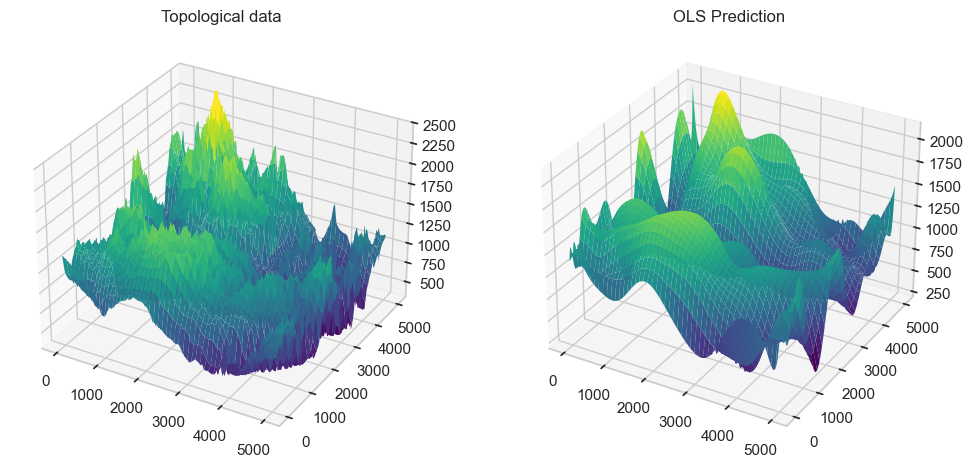

In [5]:
fig = plt.figure(figsize=(12, 6))

# Plotting the datapoints
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(x_plot, y_plot, z_orig_plot, cmap='viridis', edgecolor='none')
ax.set_title('Topological data')

# Plot the polynomial regression prediction (ideally a plane)
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(x_plot, y_plot, z_plot, cmap='viridis', edgecolor='none')
ax.set_title('OLS Prediction')

plt.show()

In [6]:
print(MSE_train)
print(MSE_test)
print(R2_train)
print(R2_test)

24748.556692370497
24771.96773518708
0.7803003346414438
0.7799058371532718


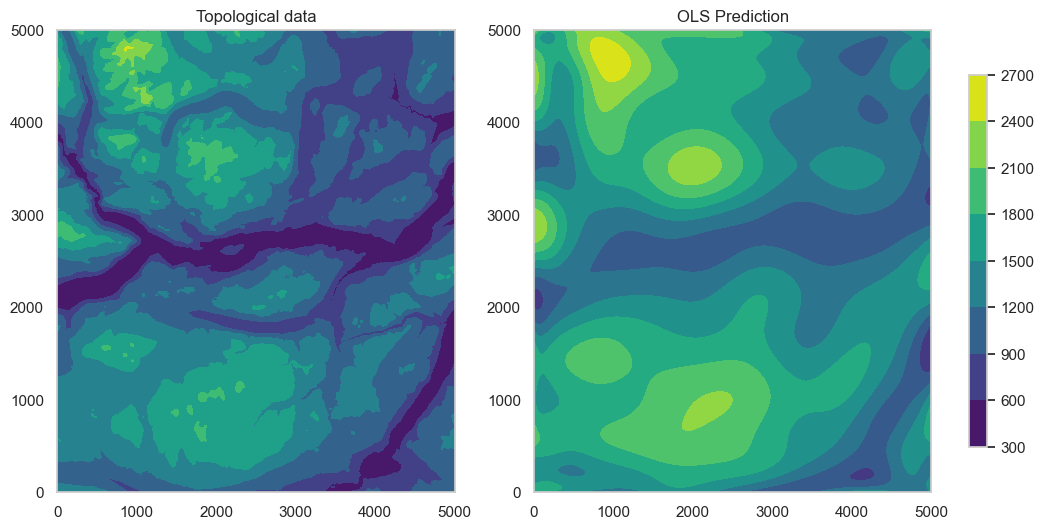

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the datapoints
original_data = axs[0].contourf(x_plot, y_plot, z_orig_plot, cmap='viridis')
axs[0].set_title('Topological data')

# Plot the polynomial regression prediction
fitted_data = axs[1].contourf(x_plot, y_plot, z_plot, cmap='viridis')
axs[1].set_title('OLS Prediction')


# Create the colorbar
contourf_objects = [original_data, fitted_data]
fig.colorbar(contourf_objects[0], ax=axs, orientation='vertical', fraction=0.02, pad=0.04)

plt.show()

In [20]:
coefs

array([ 7.97466536e+01,  1.39291104e+03,  1.04638374e+04,  2.58453960e+04,
       -2.84393217e+04, -8.42752847e+05, -2.30425890e+06,  1.71233648e+05,
        1.00199203e+06,  2.15203735e+07,  4.23685772e+07, -2.63857402e+06,
        9.66986670e+06, -3.31784919e+07, -2.67610853e+08, -4.07522924e+08,
        4.69260477e+07, -1.00655004e+08, -5.23400245e+07,  4.36956887e+08,
        1.95238019e+09,  2.44605166e+09, -4.00103557e+08,  5.54936066e+08,
        4.08202980e+08,  1.18045730e+08, -3.16400663e+09, -9.19710687e+09,
       -9.85950483e+09,  1.84103184e+09, -1.61212659e+09, -1.98407850e+09,
       -1.14875322e+09,  5.24707697e+08,  1.41827018e+10,  2.95879801e+10,
        2.77427391e+10, -5.14944366e+09,  2.00972446e+09,  6.99644011e+09,
        2.14690545e+09,  4.10016532e+09, -5.87172969e+09, -4.16082907e+10,
       -6.73045921e+10, -5.56086085e+10,  9.32142779e+09,  1.18032683e+09,
       -1.48542938e+10, -6.76207588e+09, -2.77631494e+09, -1.02876111e+10,
        2.33367633e+10,  

In [22]:
df = pd.DataFrame(np.asarray([coefs]))
df.insert(df.shape[1], "MSE_train", MSE_train)
df.insert(df.shape[1], "MSE_test", MSE_test)
df.insert(df.shape[1], "R2_train", R2_train)
df.insert(df.shape[1], "R2_test", R2_test)
df.to_csv('OLS_15_values.csv', index=False)